# IDSF Machine learning using DoS dataset
Import data set from csv file

NOTE: Using the MQTT-malaria program with only Dos attack


### 1.Data preparation

Drop unique field

Drop frame.time_delta_displayed, frame.time_epoch, frame.time_invalid, ip.src, ip.dst, eth.src, eth.dst, frame.cap_len , frame.coloring_rule.name, frame.coloring_rule.string, frame.comment, frame.comment.expert, frame.encap_type, frame.file_off, frame.ignored, frame.incomplete, frame.interface_id , frame.interface_name, frame.link_nr ,frame.marked, frame.md5_hash , frame.number , frame.offset_shift 

Convert col: mqtt.clientid (use clientid_len), mqtt.msg (yes/no), mqtt.msgid (y/n), mqtt.passwd (y/n), mqtt.topic (y/n) , mqtt.username (y/n)

Not using normalize or standadise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#feature to extract
featurenamefile = 'Feature_name.dat'
with open(featurenamefile) as file:
    feature_name = [line.rstrip() for line in file]
file.close()
ft_dict = {key: i for i, key in enumerate(feature_name)}
n_feature = len(feature_name)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename='captured_dataset_07-04-2023_1226.csv'
df = pd.read_csv(filename,na_values='',low_memory=False,names=feature_name, header=None)
df.head(5)


,frame.time_delta,frame.time_relative,ip.len,ip.protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,...,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.topic,mqtt.msgid,mqtt.msglen,mqtt.msg,mqtt.sub.qos,mqtt.suback.qos,label
0,13.813409,13.813409,60,6,10.45.0.2,192.168.57.4,47297,1883,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002317,13.815727,60,6,192.168.57.4,10.45.0.2,1883,47297,0.000539,0.000539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001783,13.817509,52,6,10.45.0.2,192.168.57.4,47297,1883,0.001095,0.000556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.001332,13.818841,60,6,10.45.0.2,192.168.57.4,41377,1883,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001577,13.820418,60,6,192.168.57.4,10.45.0.2,1883,41377,0.000165,0.000165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocessing

In [3]:
# df['label'] = 0
# df.loc[df["ip.src"] == '10.45.0.3', "label"] = 1
# df.head()


In [4]:
drop_cols = ['ip.protocol','ip.src', 'ip.dst', 'mqtt.clientid', 'mqtt.willtopic', 'mqtt.willmsg','mqtt.username','mqtt.passwd', 'mqtt.topic','mqtt.msgid','mqtt.msg'] 
df.drop(drop_cols,axis=1,inplace=True)

In [5]:
df.fillna(0,inplace=True)
df.head(5)

,frame.time_delta,frame.time_relative,ip.len,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,mqtt.num,mqtt.hdrflags,mqtt.msgtype,...,mqtt.username_len,mqtt.passwd_len,mqtt.conack.flags,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.msglen,mqtt.sub.qos,mqtt.suback.qos,label
0,13.813409,13.813409,60,47297,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002317,13.815727,60,1883,47297,0.000539,0.000539,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001783,13.817509,52,47297,1883,0.001095,0.000556,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001332,13.818841,60,41377,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001577,13.820418,60,1883,41377,0.000165,0.000165,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.loc[0,'frame.time_delta'] = 0
df.sort_values('frame.time_relative',inplace=True)
df.head(5)

,frame.time_delta,frame.time_relative,ip.len,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,mqtt.num,mqtt.hdrflags,mqtt.msgtype,...,mqtt.username_len,mqtt.passwd_len,mqtt.conack.flags,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.msglen,mqtt.sub.qos,mqtt.suback.qos,label
0,0.000000,13.813409,60,47297,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002317,13.815727,60,1883,47297,0.000539,0.000539,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001783,13.817509,52,47297,1883,0.001095,0.000556,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001332,13.818841,60,41377,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001577,13.820418,60,1883,41377,0.000165,0.000165,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.loc[df["mqtt.protoname"] == 'MQTT', "mqtt.protoname"] = 1
df.head()


,frame.time_delta,frame.time_relative,ip.len,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,mqtt.num,mqtt.hdrflags,mqtt.msgtype,...,mqtt.username_len,mqtt.passwd_len,mqtt.conack.flags,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.msglen,mqtt.sub.qos,mqtt.suback.qos,label
0,0.000000,13.813409,60,47297,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002317,13.815727,60,1883,47297,0.000539,0.000539,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001783,13.817509,52,47297,1883,0.001095,0.000556,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001332,13.818841,60,41377,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001577,13.820418,60,1883,41377,0.000165,0.000165,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df['mqtt.protoname'] = df['mqtt.protoname'].apply(pd.to_numeric) 
bin_col = ['mqtt.dupflag','mqtt.retain','mqtt.protoname','mqtt.conflag.uname','mqtt.conflag.passwd','mqtt.conflag.willretain','mqtt.conflag.willqos','mqtt.conflag.willflag','mqtt.conflag.cleansess','mqtt.conflag.reserved','mqtt.conact.flags.sp']


In [9]:
df['label'] = df['label'].astype(int)

In [10]:
# # no need
# # special_col = ['mqtt.hdrflags','mqtt.conflags','mqtt.conack.flags']
# # for col in special_col:
# #     df[col].fillna('0x0',inplace=True)
# #     df[col] = df[col].apply(lambda x: int(x,16))

# bin_col = ['mqtt.conack.flags.reserved','mqtt.conack.flags.sp','mqtt.conflag.cleansess','mqtt.conflag.passwd','mqtt.conflag.qos','mqtt.conflag.reserved','mqtt.conflag.retain','mqtt.conflag.uname','mqtt.conflag.willflag','mqtt.dupflag','mqtt.retain']

# nominal_col = ['mqtt.conack.flags','mqtt.protoname','mqtt.msgtype','mqtt.qos','mqtt.sub.qos','mqtt.suback.qos','mqtt.ver','mqtt.willmsg']
# # df['mqtt.protoname'] = df['mqtt.protoname'].apply(lambda x: 1 if x == 'MQTT' else 0)

# numeric_col = ['frame.time_delta','frame.time_relative','tcp.srcport','tcp.dstport','frame.len','mqtt.clientid_len','mqtt.conack.val','mqtt.kalive','mqtt.len','mqtt.passwd_len','mqtt.proto_len','mqtt.topic_len','mqtt.username_len','mqtt.willmsg_len','mqtt.willtopic_len']

# # df['frame.time_delta'] = pd.to_numeric( df['frame.time_delta'] )
# # df['frame.time_relative'] =  pd.to_numeric(df['frame.time_relative'])

# df.fillna(0,inplace=True)

# df['type'] = df['type'].apply(lambda x: 0 if x == 'normal' else 1)

Explore dataset:

In [11]:
print('size row,col:',len(df.index),len(df.columns))

colnames = list(df.columns)
print(colnames)

print()
print(df.dtypes)

print()
for i in range(len(colnames)):
    print(i,' ',colnames[i],' : ')
    vc = df[colnames[i]].value_counts()
    # vc = vc.reindex(sorted(vc.keys()))
    print(vc)

# print()
# for i in range(len(colnames)):
#     print(df[colnames[i]].describe())
#     print()

# numeric_cols = []
# print()
# for i in range(len(numeric_cols)):
#     print(i,' ',numeric_cols[i],' : ')
#     print(min(df[numeric_cols[i]]))
#     print(max(df[numeric_cols[i]]))
#     print()

# df['http_version'].unique()


size row,col: 206353 39
['frame.time_delta', 'frame.time_relative', 'ip.len', 'tcp.srcport', 'tcp.dstport', 'tcp.time_relative', 'tcp.time_delta', 'mqtt.num', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.dupflag', 'mqtt.qos', 'mqtt.retain', 'mqtt.len', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.ver', 'mqtt.conflags', 'mqtt.conflag.uname', 'mqtt.conflag.passwd', 'mqtt.conflag.willretain', 'mqtt.conflag.willqos', 'mqtt.conflag.willflag', 'mqtt.conflag.cleansess', 'mqtt.conflag.reserved', 'mqtt.kalive', 'mqtt.clientid_len', 'mqtt.willtopic_len', 'mqtt.willmsg_len', 'mqtt.username_len', 'mqtt.passwd_len', 'mqtt.conack.flags', 'mqtt.conact.flags.sp', 'mqtt.conack.val', 'mqtt.topic_len', 'mqtt.msglen', 'mqtt.sub.qos', 'mqtt.suback.qos', 'label']

frame.time_delta           float64
frame.time_relative        float64
ip.len                       int64
tcp.srcport                  int64
tcp.dstport                  int64
tcp.time_relative          float64
tcp.time_delta             float64
mqtt.num   

### 1.2.Split dataset to train and test 
Train   : 80%
Test    : 20%

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
dataX = df.drop([ 'label'], axis=1)
dataY = df['label']

train_X = train.drop(['label'], axis=1)
train_Y = train['label']

test_X = test.drop(['label'], axis=1)
test_Y = test['label']

type_class = train['label'].unique()
print(type_class)


[1 0]


In [13]:
# Extract feature name
test_cols = list(test_X.columns)

featurenamefile = 'Feature_use_training.dat'
f = open(featurenamefile,'w')
for name in test_cols:
    f.write(name+'\n')
f.close()

### 1.3.Visualise the distribution of dataset

<AxesSubplot: >

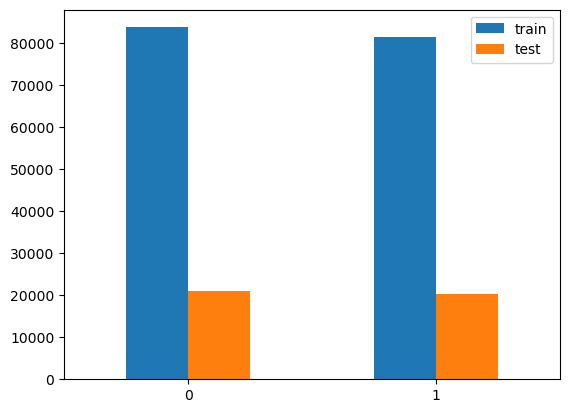

In [14]:
pd.DataFrame({
  'train': train['label'].value_counts(),
  'test': test['label'].value_counts()},
  ).plot.bar(rot=0)

<AxesSubplot: >

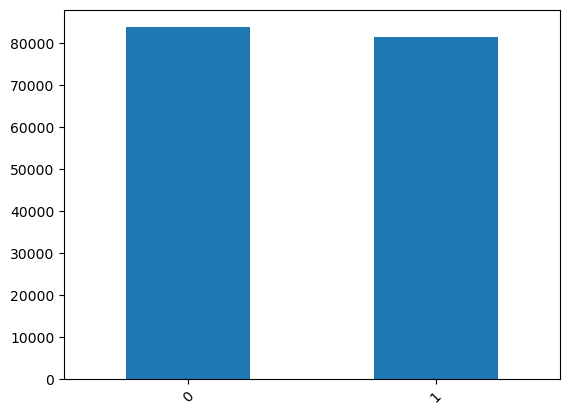

In [15]:
train_Y.value_counts().plot.bar(rot=45)

## 2.ML (without cross-validation)


### 2.1.LinearSVC

**default loss : ‘squared_hinge’ is like hinge but is quadratically penalized.**

In [16]:
from sklearn.svm import LinearSVC
from sklearn import metrics

#Train
lsvc_model = LinearSVC(C=0.1, dual=False, max_iter=10000)
lsvc_model.fit(train_X, train_Y)

lsvc_preds = lsvc_model.predict(train_X)
lsvc_accuracy = metrics.accuracy_score(train_Y, lsvc_preds)
print('train acc:',lsvc_accuracy)

#Test
lsvc_test_preds = lsvc_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)

train acc: 1.0
test acc: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21038
           1       1.00      1.00      1.00     20233

    accuracy                           1.00     41271
   macro avg       1.00      1.00      1.00     41271
weighted avg       1.00      1.00      1.00     41271



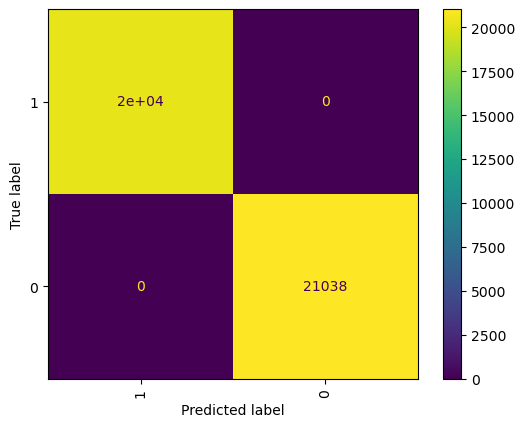

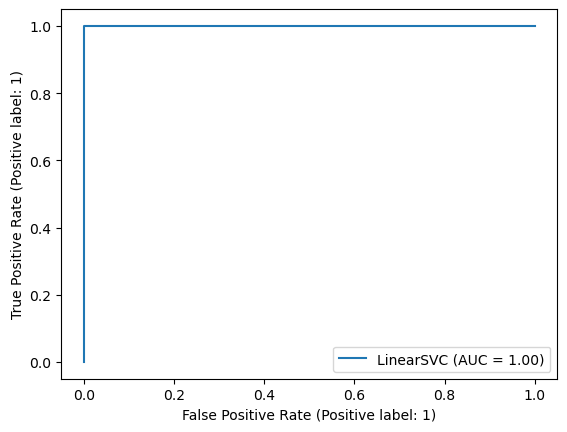

In [17]:
#Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)

# precision_score, recall_score, fbeta_score, count = metrics.precision_recall_fscore_support(test_Y,lsvc_test_preds,labels=type_class)
# print(precision_score, recall_score, fbeta_score)

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(lsvc_model,test_X,test_Y)

In [18]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# linearSVC
filename = modelfile + '_LSVC' + filetype
joblib.dump(lsvc_model,filename)


['IDSF_model_LSVC.joblib']

### 2.2.SGDClassifier (not recommend)

**SVM with logistic regression, a probabilistic classifier**

SGDClassifier can optimize the same cost function as LinearSVC by adjusting the penalty and loss parameters. In addition it requires less memory, allows incremental (online) learning, and implements various loss functions and regularization regimes.

Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

#Train
sgd_model = SGDClassifier(loss='log',max_iter=10000)
sgd_model.fit(train_X, train_Y)

sgd_preds = sgd_model.predict(train_X)
sgd_accuracy = metrics.accuracy_score(train_Y, sgd_preds)
print('train acc:',sgd_accuracy)

#Test
sgd_test_preds = sgd_model.predict(test_X)
sgd_test_accuracy = metrics.accuracy_score(test_Y, sgd_test_preds)
print('test acc:',sgd_test_accuracy)

train acc: 1.0
test acc: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21038
           1       1.00      1.00      1.00     20233

    accuracy                           1.00     41271
   macro avg       1.00      1.00      1.00     41271
weighted avg       1.00      1.00      1.00     41271



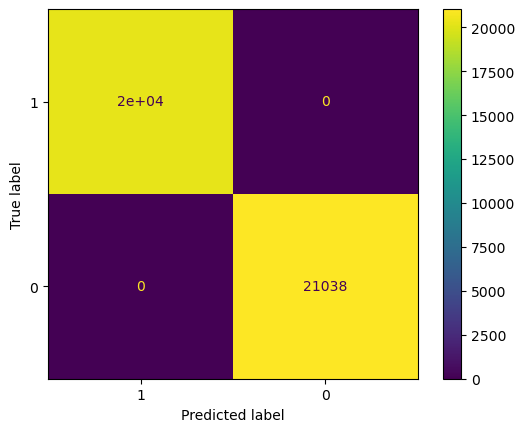

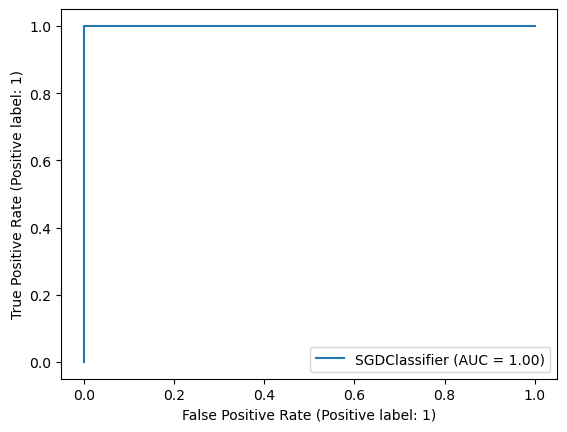

In [20]:
#Evaluate
print(metrics.classification_report(test_Y,sgd_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, sgd_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(sgd_model,test_X,test_Y) 

In [21]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# SGDC
filename = modelfile + '_SGDC' + filetype
joblib.dump(sgd_model,filename)


['IDSF_model_SGDC.joblib']

### 2.3 Decision Tree

random forest

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(train_X, train_Y)

dt_clf_train_preds = dt_clf.predict(train_X)
dt_clf_train_accuracy = metrics.accuracy_score(train_Y, dt_clf_train_preds)
print('train acc:',dt_clf_train_accuracy)

#Test
dt_clf_test_preds = dt_clf.predict(test_X)
dt_clf_test_accuracy = metrics.accuracy_score(test_Y, dt_clf_test_preds)
print('test acc:',dt_clf_test_accuracy)

train acc: 1.0
test acc: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21038
           1       1.00      1.00      1.00     20233

    accuracy                           1.00     41271
   macro avg       1.00      1.00      1.00     41271
weighted avg       1.00      1.00      1.00     41271



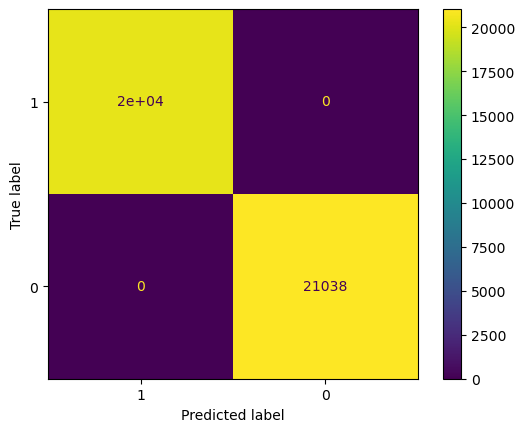

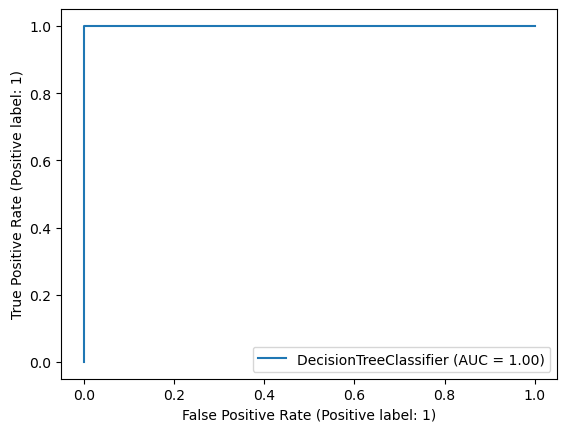

In [23]:
#Evaluate
print(metrics.classification_report(test_Y,dt_clf_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, dt_clf_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(dt_clf,test_X,test_Y) 

In [24]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_DT' + filetype
joblib.dump(dt_clf,filename)


['IDSF_model_DT.joblib']

### 2.4 NeuralNet

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mpl_clf = MLPClassifier(solver='adam',
                        activation = 'relu',
                        alpha=1e-4,
                        learning_rate = 'adaptive',
                        hidden_layer_sizes=(50,38), 
                        random_state=1)
mpl_clf = mpl_clf.fit(train_X, train_Y)

mpl_clf_train_preds = mpl_clf.predict(train_X)
mpl_clf_train_accuracy = metrics.accuracy_score(train_Y, mpl_clf_train_preds)
print('train acc:',mpl_clf_train_accuracy)

#Test
mpl_clf_test_preds = mpl_clf.predict(test_X)
mpl_clf_test_accuracy = metrics.accuracy_score(test_Y, mpl_clf_test_preds)
print('test acc:',mpl_clf_test_accuracy)

train acc: 1.0
test acc: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21038
           1       1.00      1.00      1.00     20233

    accuracy                           1.00     41271
   macro avg       1.00      1.00      1.00     41271
weighted avg       1.00      1.00      1.00     41271



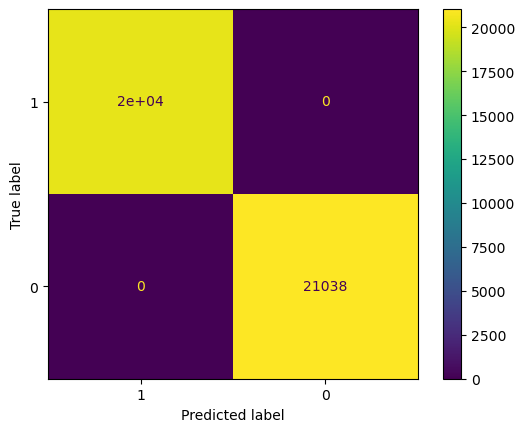

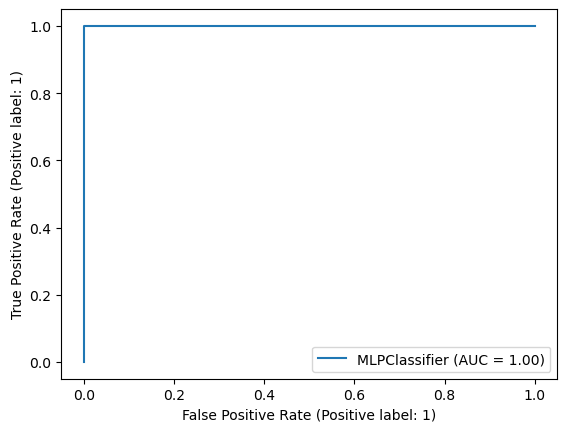

In [26]:
#Evaluate
print(metrics.classification_report(test_Y,mpl_clf_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, mpl_clf_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(mpl_clf,test_X,test_Y) 

In [27]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# neural net
filename = modelfile + '_Neural' + filetype
joblib.dump(mpl_clf,filename)


['IDSF_model_Neural.joblib']

### 2.5 Non-linear SVM

Parameters of the RBF Kernel

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [128]:
from sklearn.svm import SVC
from sklearn import metrics

rbf_svc_clf = SVC(C=0.1,kernel='rbf',gamma='auto',tol=1e-3)
rbf_svc_clf = rbf_svc_clf.fit(train_X, train_Y)

rbf_svc_clf_train_preds = rbf_svc_clf.predict(train_X)
rbf_svc_clf_train_accuracy = metrics.accuracy_score(train_Y, rbf_svc_clf_train_preds)
print('train acc:',rbf_svc_clf_train_accuracy)

#Test
rbf_svc_clf_test_preds = rbf_svc_clf.predict(test_X)
rbf_svc_clf_test_accuracy = metrics.accuracy_score(test_Y, rbf_svc_clf_test_preds)
print('test acc:',rbf_svc_clf_test_accuracy)

: 

In [ ]:
#Evaluate
print(metrics.classification_report(test_Y,rbf_svc_clf_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, rbf_svc_clf_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(rbf_svc_clf,test_X,test_Y) 

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# RBF SVC
filename = modelfile + '_RBF_SVC' + filetype
joblib.dump(rbf_svc_clf,filename)


## 3.Grid Search: Hyperparameter Tuning

Default cv: default 5-fold cross validation


### 3.1 Linear

Linear get to optimal maxima but stochastic only go local maxima so it get the general characteristic instead of 

In [28]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

lsvc_model = LinearSVC(C=0.1, dual=False, max_iter=10000)

#Cross-validation Train
lsvc_cv = cross_validate(lsvc_model,train_X,train_Y,return_estimator=True) 
print('mean=',lsvc_cv['test_score'].mean(),', std=',lsvc_cv['test_score'].std())

lsvc_train_preds = []
for mdl in lsvc_cv['estimator']:
    lsvc_train_preds.append(mdl.score(train_X,train_Y))
lsvc_accuracy = sum(lsvc_train_preds)/len(lsvc_train_preds)
print('mean train acc:',lsvc_accuracy)

#Test
lsvc_test_preds = []
for mdl in lsvc_cv['estimator']:
    lsvc_test_preds.append(mdl.score(test_X,test_Y)) 
lsvc_test_accuracy = sum(lsvc_test_preds)/len(lsvc_test_preds)
print('mean test acc:',lsvc_test_accuracy)

#Best estimator
best_mdl_idx = lsvc_test_preds.index(max(lsvc_test_preds))
lsvc_model = lsvc_cv['estimator'][best_mdl_idx]


mean= 1.0 , std= 0.0
mean train acc: 1.0
mean test acc: 1.0


In [5]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# linearSVC
filename = modelfile + '_LSVC' + filetype
joblib.dump(lsvc_model,filename)


['IDSF_model_LSVC.joblib']

### 3.2 SGDClassifier

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

sgd_model = SGDClassifier(loss='log',max_iter=10000)

#Cross-validation Train
sgd_cv = cross_validate(sgd_model,train_X,train_Y,return_estimator=True) 
print('mean=',sgd_cv['test_score'].mean(),', std=',sgd_cv['test_score'].std())

sgd_train_preds = []
for mdl in sgd_cv['estimator']:
    sgd_train_preds.append(mdl.score(train_X,train_Y))
sgd_accuracy = sum(sgd_train_preds)/len(sgd_train_preds)
print('mean train acc:',sgd_accuracy)

#Test
sgd_test_preds = []
for mdl in sgd_cv['estimator']:
    sgd_test_preds.append(mdl.score(test_X,test_Y)) 
sgd_test_accuracy = sum(sgd_test_preds)/len(sgd_test_preds)
print('mean test acc:',sgd_test_accuracy)

#Best estimator
best_mdl_idx = sgd_test_preds.index(max(sgd_test_preds))
sgd_model = sgd_cv['estimator'][best_mdl_idx]


mean= 1.0 , std= 0.0
mean train acc: 1.0
mean test acc: 0.9999951539822151


In [30]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# SGDC
filename = modelfile + '_SGDC' + filetype
joblib.dump(sgd_model,filename)


['IDSF_model_SGDC.joblib']

### 3.3 Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

dt_clf = DecisionTreeClassifier()

#Cross-validation Train
dt_clf_cv = cross_validate(dt_clf,train_X,train_Y,return_estimator=True) 
print('mean=',dt_clf_cv['test_score'].mean(),', std=',dt_clf_cv['test_score'].std())

dt_clf_train_preds = []
for mdl in dt_clf_cv['estimator']:
    dt_clf_train_preds.append(mdl.score(train_X,train_Y))
dt_clf_accuracy = sum(dt_clf_train_preds)/len(dt_clf_train_preds)
print('mean train acc:',dt_clf_accuracy)

#Test
dt_clf_test_preds = []
for mdl in dt_clf_cv['estimator']:
    dt_clf_test_preds.append(mdl.score(test_X,test_Y)) 
dt_clf_test_accuracy = sum(dt_clf_test_preds)/len(dt_clf_test_preds)
print('mean test acc:',dt_clf_test_accuracy)

#Best estimator
best_mdl_idx = dt_clf_test_preds.index(max(dt_clf_test_preds))
dt_clf = dt_clf_cv['estimator'][best_mdl_idx]


mean= 1.0 , std= 0.0
mean train acc: 1.0
mean test acc: 1.0


In [32]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_DT' + filetype
joblib.dump(dt_clf,filename)


['IDSF_model_DT.joblib']

### 3.4 Neural Net

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

mpl_clf = MLPClassifier(solver='adam',
                        activation = 'relu',
                        alpha=1e-4,
                        learning_rate = 'adaptive',
                        hidden_layer_sizes=(50,38), 
                        random_state=1)

#Cross-validation Train
mpl_clf_cv = cross_validate(mpl_clf,train_X, train_Y,return_estimator=True)
print('mean=',mpl_clf_cv['test_score'].mean(),', std=',mpl_clf_cv['test_score'].std())

mpl_cv_train_preds = []
for mdl in mpl_clf_cv['estimator']:
    mpl_cv_train_preds.append(mdl.score(train_X,train_Y))
mpl_cv_train_accuracy = sum(mpl_cv_train_preds)/len(mpl_cv_train_preds)
print('mean train acc:',mpl_cv_train_accuracy)

#Test
mpl_cv_test_preds = []
for mdl in mpl_clf_cv['estimator']:
    mpl_cv_test_preds.append(mdl.score(test_X,test_Y)) 
mpl_cv_test_accuracy = sum(mpl_cv_test_preds)/len(mpl_cv_test_preds)
print('mean test acc:',mpl_cv_test_accuracy)

#Best estimator
best_mdl_idx = mpl_cv_test_preds.index(max(mpl_cv_test_preds))
mpl_clf = mpl_clf_cv['estimator'][best_mdl_idx]


mean= 1.0 , std= 0.0
mean train acc: 1.0
mean test acc: 1.0


In [ ]:
# # mpl_cv_test_preds=mpl_clf_test_preds.copy()
# best_mpl_model = mpl_clf_cv['estimator'][mpl_cv_test_preds.index(max(mpl_cv_test_preds))]

# mpl_clf_test_preds = best_mpl_model.predict(test_X)
# mpl_clf_test_accuracy = metrics.accuracy_score(test_Y, mpl_clf_test_preds)
# print('test acc:',mpl_clf_test_accuracy)

# #Evaluate
# print(metrics.classification_report(test_Y,mpl_clf_test_preds))

# conf_matrix = metrics.confusion_matrix(test_Y, mpl_clf_test_preds, labels=type_class)
# metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

# from sklearn.metrics import roc_curve,RocCurveDisplay
# roc_display = RocCurveDisplay.from_estimator(best_mpl_model,test_X,test_Y) 

In [34]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# neural net
filename = modelfile + '_Neural' + filetype
joblib.dump(mpl_clf,filename)

['IDSF_model_Neural.joblib']

### 3.5 Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

rf_clf = RandomForestClassifier()

#Cross-validation Train
rf_clf_cv = cross_validate(rf_clf,train_X,train_Y,return_estimator=True) 
print('mean=',rf_clf_cv['test_score'].mean(),', std=',rf_clf_cv['test_score'].std())

rf_clf_train_preds = []
for mdl in rf_clf_cv['estimator']:
    rf_clf_train_preds.append(mdl.score(train_X,train_Y))
rf_clf_accuracy = sum(rf_clf_train_preds)/len(rf_clf_train_preds)
print('mean train acc:',rf_clf_accuracy)

#Test
rf_clf_test_preds = []
for mdl in rf_clf_cv['estimator']:
    rf_clf_test_preds.append(mdl.score(test_X,test_Y)) 
rf_clf_test_accuracy = sum(rf_clf_test_preds)/len(rf_clf_test_preds)
print('mean test acc:',rf_clf_test_accuracy)

#Best estimator
best_mdl_idx = rf_clf_test_preds.index(max(rf_clf_test_preds))
rf_clf = rf_clf_cv['estimator'][best_mdl_idx]


mean= 1.0 , std= 0.0
mean train acc: 1.0
mean test acc: 1.0


In [36]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_RF' + filetype
joblib.dump(rf_clf,filename)


['IDSF_model_RF.joblib']

### 3.6 XGBoost

In [37]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

xgb_clf = XGBClassifier()

#Cross-validation Train
xgb_clf_cv = cross_validate(xgb_clf,train_X,train_Y,return_estimator=True) 
print('mean=',xgb_clf_cv['test_score'].mean(),', std=',xgb_clf_cv['test_score'].std())

xgb_clf_train_preds = []
for mdl in xgb_clf_cv['estimator']:
    xgb_clf_train_preds.append(mdl.score(train_X,train_Y))
xgb_clf_accuracy = sum(xgb_clf_train_preds)/len(xgb_clf_train_preds)
print('mean train acc:',xgb_clf_accuracy)

#Test
xgb_clf_test_preds = []
for mdl in xgb_clf_cv['estimator']:
    xgb_clf_test_preds.append(mdl.score(test_X,test_Y)) 
xgb_clf_test_accuracy = sum(xgb_clf_test_preds)/len(xgb_clf_test_preds)
print('mean test acc:',xgb_clf_test_accuracy)

#Best estimator
best_mdl_idx = xgb_clf_test_preds.index(max(xgb_clf_test_preds))
xgb_clf = xgb_clf_cv['estimator'][best_mdl_idx]


mean= 1.0 , std= 0.0
mean train acc: 1.0
mean test acc: 1.0


In [38]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_XGBoost' + filetype
joblib.dump(xgb_clf,filename)


['IDSF_model_XGBoost.joblib']

## 4. Model save and load

Save model to pickle file

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# linearSVC
filename = modelfile + '_LSVC' + filetype
joblib.dump(lsvc_model,filename)

# SGDC
filename = modelfile + '_SGDC' + filetype
joblib.dump(sgd_model,filename)

# Decision Tree
filename = modelfile + '_DT' + filetype
joblib.dump(dt_clf,filename)

# neural net
filename = modelfile + '_Neural' + filetype
joblib.dump(mpl_clf,filename)

# RBF SVC
# filename = modelfile + '_RBF_SVC' + filetype
# joblib.dump(rbf_svc_clf,filename)


In [13]:
# Load

# linearSVC
filename = modelfile + '_LSVC' + filetype
loaded_model = joblib.load(filename)
result = loaded_model.score(test_X, test_Y)
print(loaded_model,result)

# SGDC
filename = modelfile + '_SGDC' + filetype
loaded_model = joblib.load(filename)
result = loaded_model.score(test_X, test_Y)
print(loaded_model,result)

# Decision Tree
filename = modelfile + '_DT' + filetype
loaded_model = joblib.load(filename)
result = loaded_model.score(test_X, test_Y)
print(loaded_model,result)

# neural net
filename = modelfile + '_Neural' + filetype
loaded_model = joblib.load(filename)
result = loaded_model.score(test_X, test_Y)
print(loaded_model,result)

# RBF SVC
# filename = modelfile + '_RBF_SVC' + filetype
# loaded_model = joblib.load(filename)
# result = loaded_model.score(test_X, test_Y)
# print(loaded_model,result)


LinearSVC(C=0.1, dual=False, max_iter=10000) 0.9354821664464993
SGDClassifier(loss='log', max_iter=10000) 0.9245970937912814
DecisionTreeClassifier() 0.9984147952443857
MLPClassifier(hidden_layer_sizes=(50, 38), learning_rate='adaptive',
              random_state=1) 0.9964068692206076


note: XGBoost, RF

In [1]:
import xgboost
print(xgboost.__version__)


1.7.3


In [59]:
# import pandas module
import pandas as pd
 
# create dataframe with 3 columns
data = pd.DataFrame({
    "id": [7058, 7059, 7072, 7054],
    "name": ['sravan', 'jyothika', 'harsha', 'ramya'],
    "subjects": ['java', 'python', 'html/php', 'php/js']
}
)

colname = ['id','name','subjects']

df_temp  = pd.DataFrame(index=[0],columns=colname)
print(df_temp)

df_temp['id'] = 10
print(df_temp)
# print(data)

# row = pd.Series([1,'jon','c'],index = ['id','name','subjects'])
# print(row)

data = pd.concat([data,df_temp],ignore_index=True)

data['id'] = 10
print(type(data['id']))

# df = pd.DataFrame(0,index=[0], columns=colnames)
# testsr = pd.Series(0,index=colnames)

# print(testsr['frame.len'])



    id name subjects
0  NaN  NaN      NaN
   id name subjects
0  10  NaN      NaN
<class 'pandas.core.series.Series'>


In [61]:
from scapy.all import IP,TCP
ip_packet = IP()/TCP()

tcp_packet = ip_packet.payload
print(type(tcp_packet))

pay = tcp_packet.payload
print(type(pay))

if ip_packet.haslayer(IP):
    ip_packet = ip_packet[IP]
ip_packet.show()

<class 'scapy.layers.inet.TCP'>
<class 'scapy.packet.NoPayload'>
###[ IP ]### 
  version   = 4
  ihl       = None
  tos       = 0x0
  len       = None
  id        = 1
  flags     = 
  frag      = 0
  ttl       = 64
  proto     = tcp
  chksum    = None
  src       = 127.0.0.1
  dst       = 127.0.0.1
  \options   \
###[ TCP ]### 
     sport     = ftp_data
     dport     = http
     seq       = 0
     ack       = 0
     dataofs   = None
     reserved  = 0
     flags     = S
     window    = 8192
     chksum    = None
     urgptr    = 0
     options   = ''



In [57]:
from datetime import datetime
datetime_str = datetime.now().strftime('%d-%m-%Y_%H%M')
csvfile = 'emulation_dataset_'+datetime_str+'.csv'
csvfile

'emulation_dataset_23-02-2023_1312.csv'